In [1]:
import gif
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [3]:
@gif.frame
def frame(i):
    x = np.linspace(0, 2 * np.pi, 100)
    y = np.sin(x)
    plt.plot(x, y)
    plt.scatter([x[i]], [y[i]]);
    
frames = [frame(i) for i in range(100)]

gif.save(frames, "sine.gif",duration = 200)

Text(0.5, 0, 'z')

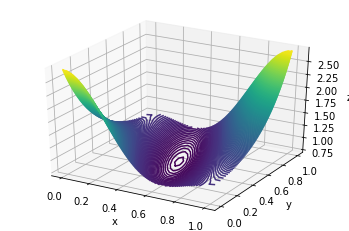

In [2]:
def f(x, y):
    return np.exp(-5 * (1-x)**2+y**2)+np.exp(-5*x**2+(1-y)**2)


x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 200)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [3]:
XX = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis = 1)

In [94]:
YY = Z.reshape(-1, 1).flatten()#+ np.random.randn(900)

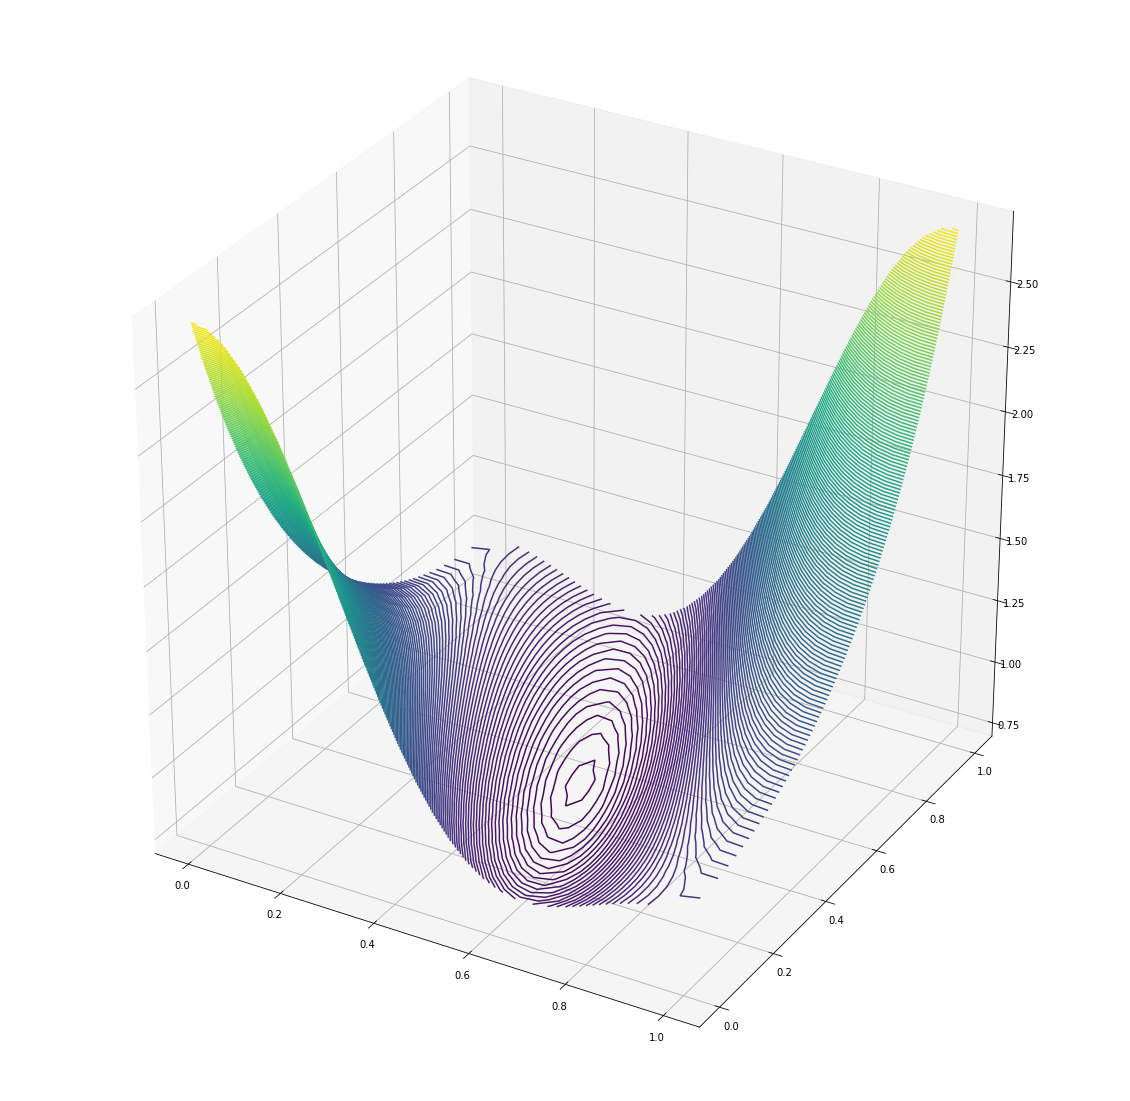

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
param_grid = dict(n_estimators = [10, 50, 100, 200], max_depth = [1, 5, 10])
model = GridSearchCV(GradientBoostingRegressor(), param_grid = param_grid, cv = 5).fit(XX, YY)
print(model.best_estimator_)
YY_pred = model.predict(XX)

GradientBoostingRegressor(max_depth=1)


Text(0.5, 0, 'z')

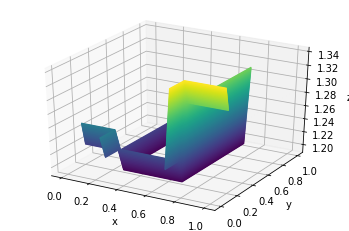

In [97]:
x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)

X, Y = np.meshgrid(x, y)
Z = YY_pred.reshape(30, 30)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 200)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [44]:
sample_points = 30



@gif.frame
def frame(i):
    fig = plt.figure(figsize = (20, 20), tight_layout = True)
    ax = plt.axes(projection='3d')
    
    x = np.linspace(0, 1, sample_points)
    y = np.linspace(0, 1, sample_points)
    
    X, Y = np.meshgrid(x, y)
    
    XX = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis = 1)
    Z = f(X, Y)
    ax.plot_wireframe(X, Y, Z, alpha = 1 - (i / 100))
    YY = Z.reshape(-1, 1).flatten()# + np.random.randn(900)
    
    model = GradientBoostingRegressor(n_estimators = i, max_depth = 2).fit(XX, YY)
    YY_pred = model.predict(XX)

    Z = YY_pred.reshape(sample_points, sample_points)

    
    
    
    
    ax.plot_wireframe(X, Y, Z, color="red")
    plt.axis('off')
    ax.grid(False)
    ax.view_init(azim=i)
    #plt.title("Test")
    #ax.set_xlabel('x')
    #ax.set_ylabel('y')
    #ax.set_zlabel('z')
    ;
    
frames = [frame(i) for i in np.arange(1, 100)]

gif.save(frames, "sine.gif",duration = 200)